In [1]:
import pandas as pd
import transform
import numpy as np
import re

import matplotlib.pyplot as plt
%matplotlib inline

import scipy as sp 
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
from matplotlib import cm

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# Exploring
import scipy.stats as stats
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 5000)

# Acquire & Prepare

### import everything from folder and put them into one dataframe - race, income, age, gender, pop, pcat (percentage of broadband acceptance/adoption)

In [2]:
df = transform.load_all('/Users/rachelreuter/capstone/digital_inclusion/Data')

In [3]:
df.head()

blockgroup  male_age_bin_0-19_p  male_age_bin_20-29_p  males_age_bin_30-44_p  male_age_bin_45-59_p  male_age_bin_60+_p  female_age_bin_0-19_p  female_age_bin_20-29_p  females_age_bin_30-44_p  female_age_bin_45-59_p  female_age_bin_60+_p  pop_tot  income_median  income_0-19k_p  income_20-24k_p  income_25-39k_p  income_40-64k_p  income_65k+_p   White_p  African_American_p  Native_American_p   Asian_p  Hawaiian_Pac_Islander_p  Hispanic/Latino_p  pcat_10x1_mean  pcat_10x1_median
0  480291101001             0.000000              0.164000               0.290000              0.094000            0.070000               0.016000                0.130000                 0.084000                0.050000              0.102000      500          31314        0.284848         0.018182         0.384848         0.093939       0.218182  0.864000            0.026000           0.000000  0.010000                      0.0           0.318000               4                 4
1  480291101002             0.045521              0.117474               0.066079              0.130690            0.245228               0.000000                0.020558                 0.058737                0.093979              0.221733      681          45655        0.240000         0.046316         0.115789         0.320000       0.277895  0.883994            0.055800           0.000000  0.000000                      0.0           0.512482               4                 4
2  480291101003             0.056018              0.147046               0.257330              0.091028            0.102407               0.030197                0.055580                 0.122976                0.073085              0.064333     2285          47988        0.261603         0.034810         0.168776         0.108650       0.426160  0.766740            0.045952           0.010503  0.002626                      0.0           0.737418               4                 4
3  480291103001             0.152971              0.077750               0.104298              0.081542            0.063211               0.143489                0.139064                 0.132111                0.061315              0.044248     1582          25104        0.408931         0.090482         0.054054         0.095182       0.351351  0.580278            0.228824           0.003161  0.000000                      0.0           0.618837               2                 2
4  480291103002             0.084871              0.095941               0.119004              0.122694            0.088561               0.089483                0.057196                 0.178967                0.048893              0.114391     1084          37146        0.354839         0.000000         0.163772         0.330025       0.151365  0.782288            0.000000           0.009225  0.008303                      0.0           0.861624               2                 2

## Binning the target variable into two binary categories:

### _'has suitable internet: 1' (cat 5), and;_

### _'does not have suitable internet: 0' (cats 1,2,3,4)._

In [5]:
df["has_broadband"] = [1 if ele == 5 else 0 for ele in df["pcat_10x1_mean"]]

### Train Test Split for Explore

In [6]:
train, test = train_test_split(df, test_size=.30, random_state=123)

# Explore

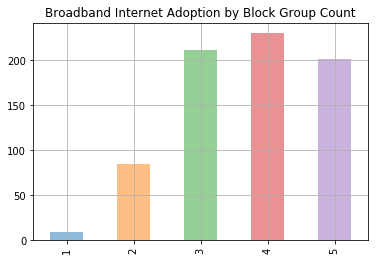

In [7]:
train.pcat_10x1_mean.value_counts().sort_index().plot(kind = "bar",alpha = .5)
plt.title("Broadband Internet Adoption by Block Group Count")
plt.grid(b = True , which = "major")

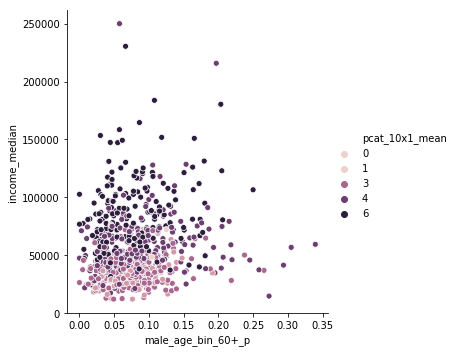

In [8]:
sns.relplot(x="male_age_bin_60+_p", y="income_median", hue="pcat_10x1_mean", data=train)

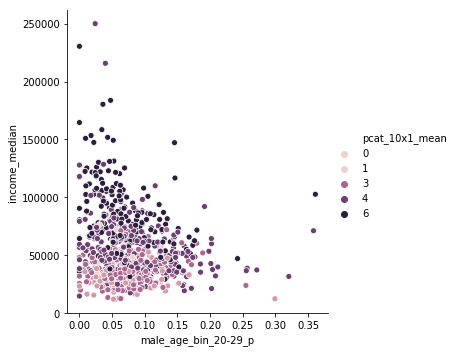

In [9]:
sns.relplot(x="male_age_bin_20-29_p", y="income_median", hue="pcat_10x1_mean", data=train)

#### age doesn't seem to be a huge driver. However, it the 20-29 age group does appear to have a higher connectivity speed.

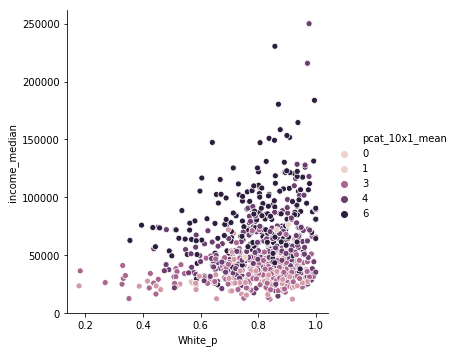

In [10]:
sns.relplot(x="White_p", y="income_median", hue="pcat_10x1_mean", data=train)

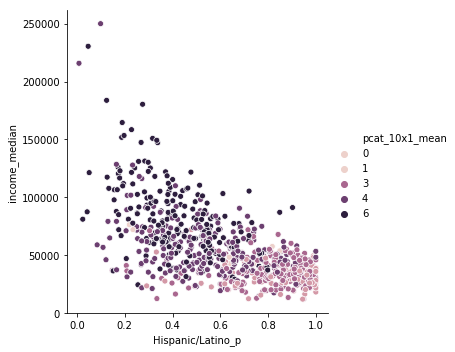

In [11]:
sns.relplot(x="Hispanic/Latino_p", y="income_median", hue="pcat_10x1_mean", data=train)

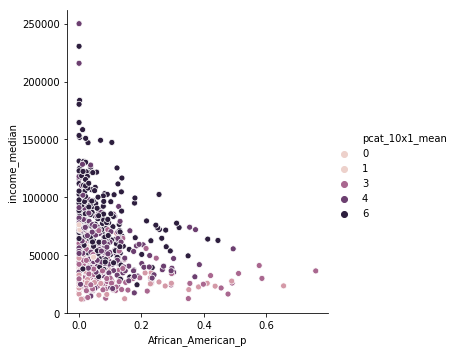

In [12]:
sns.relplot(x="African_American_p", y="income_median", hue="pcat_10x1_mean", data=train)

#### race really seems to be a large driver. The more hispanics there are in a blockgroup, the connectivity goes down and vice versa for whites.

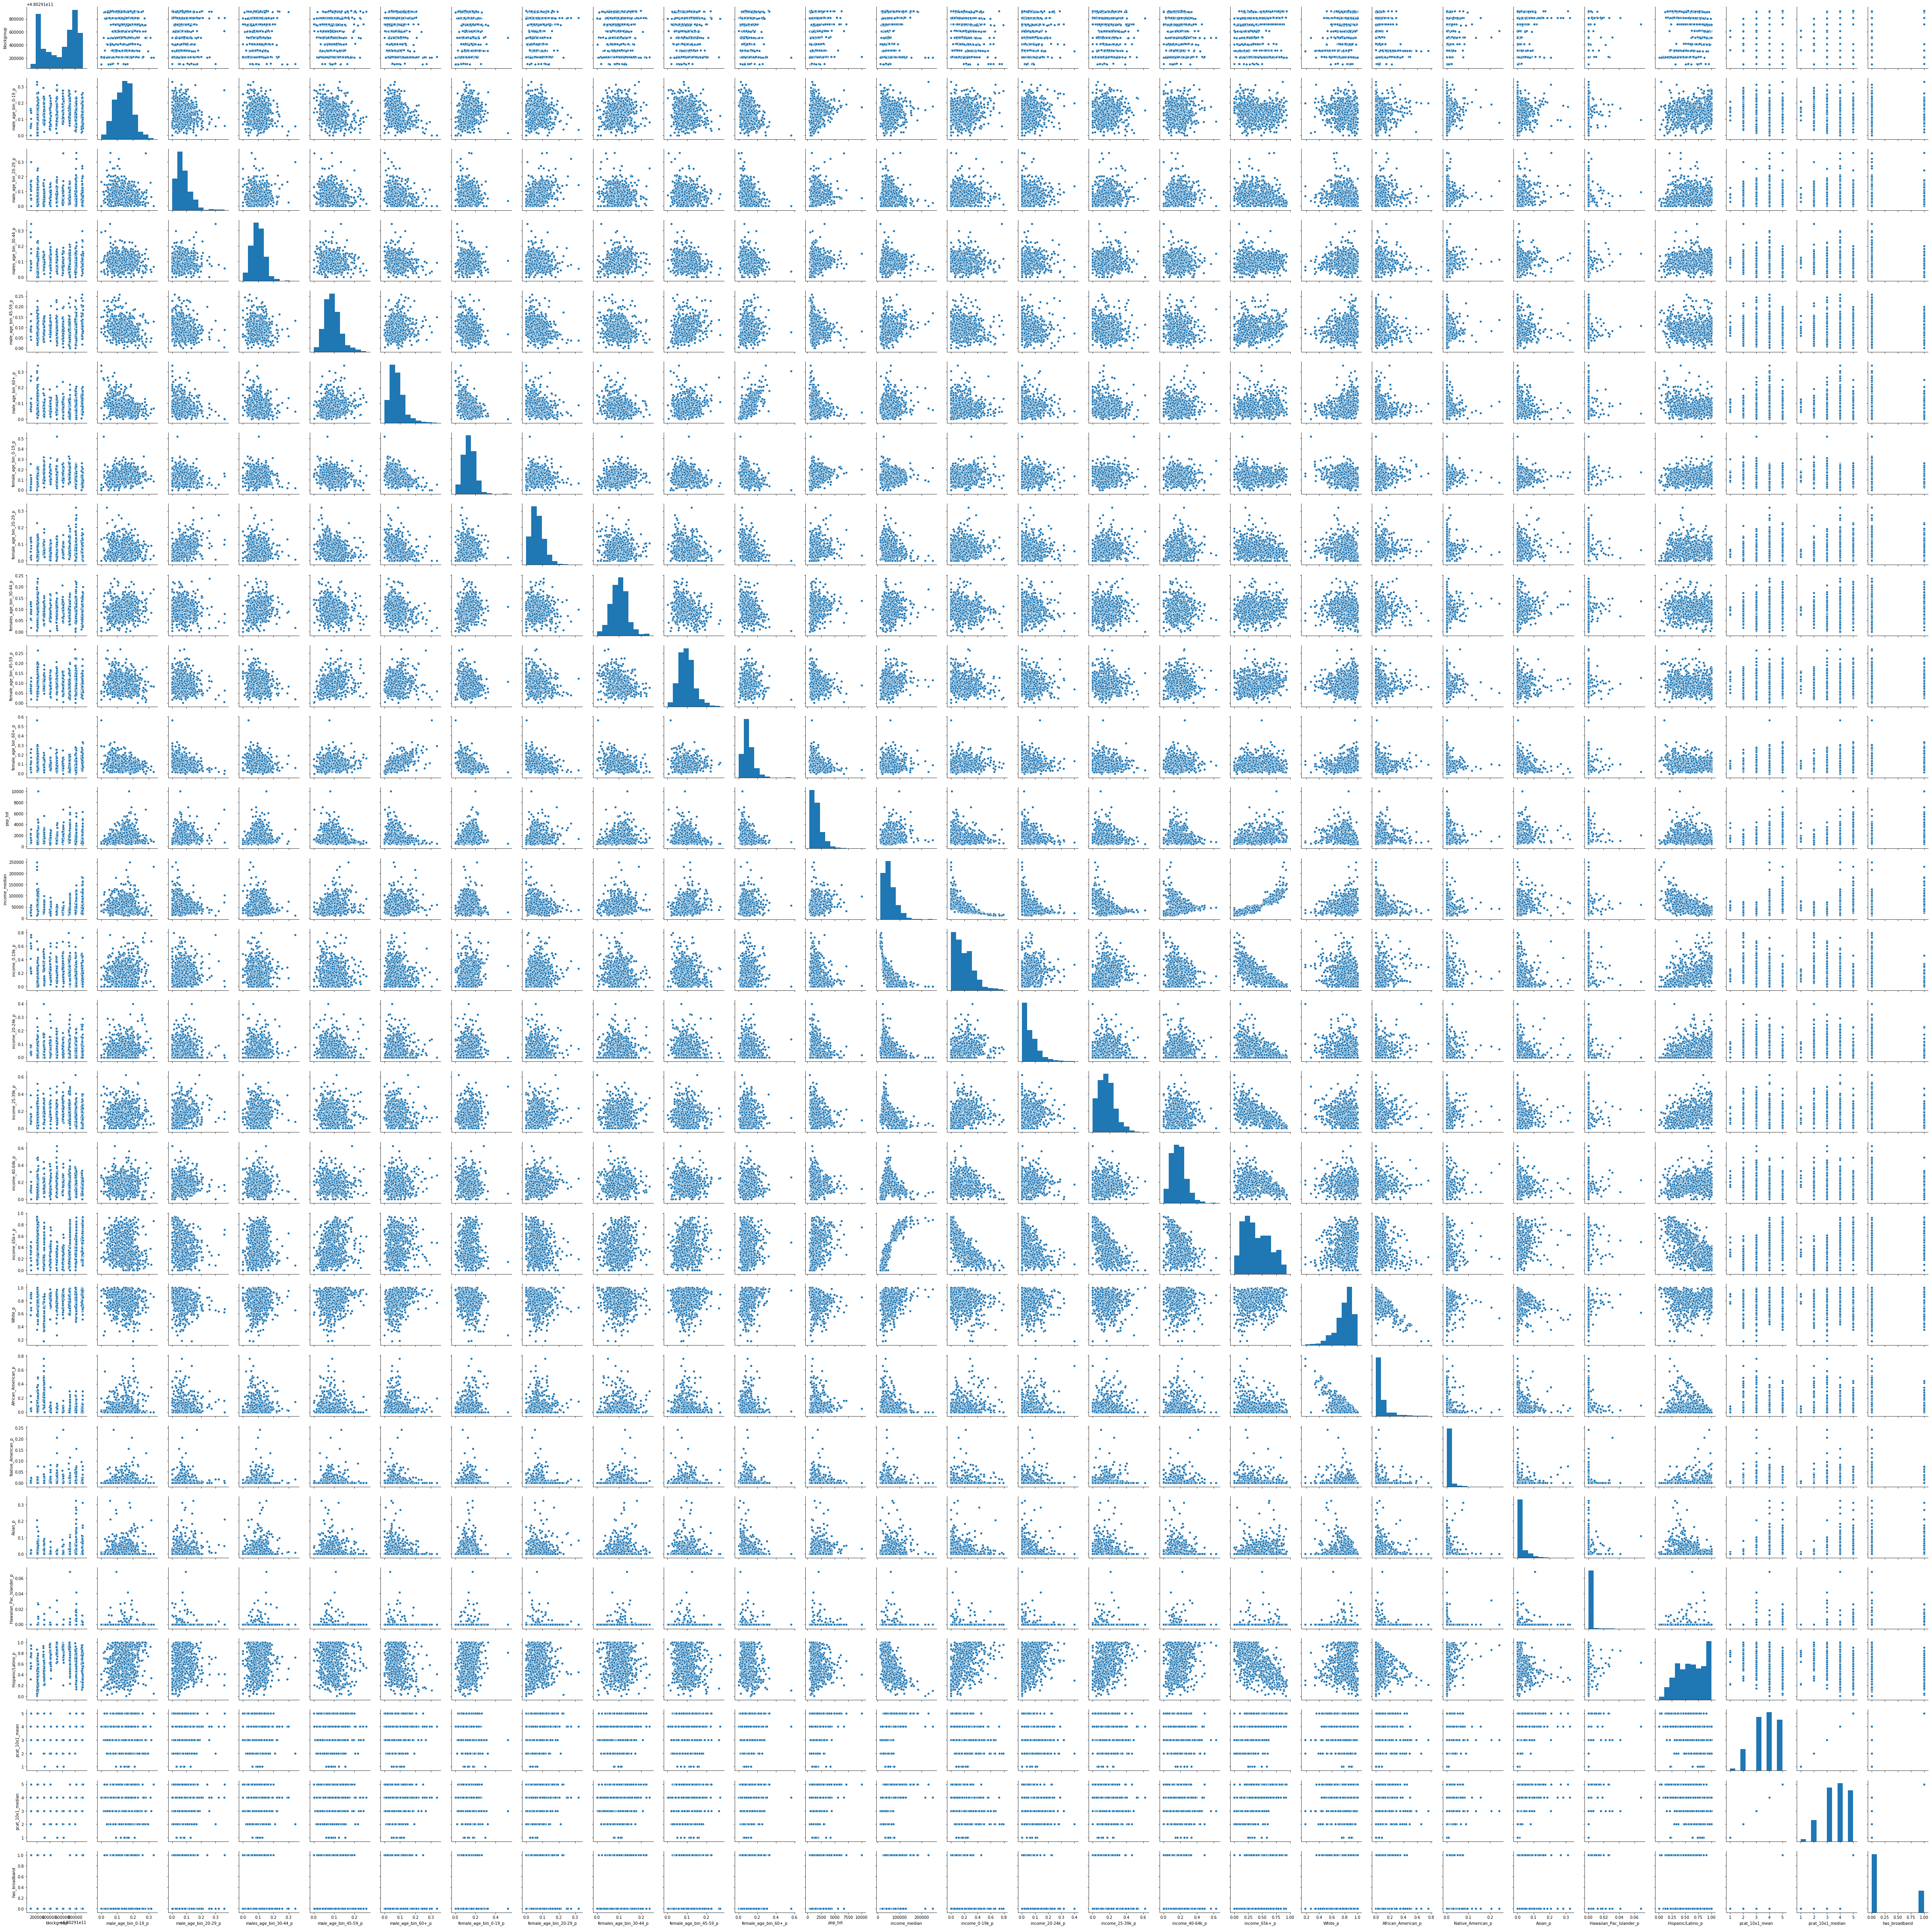

In [13]:
sns.pairplot(train)

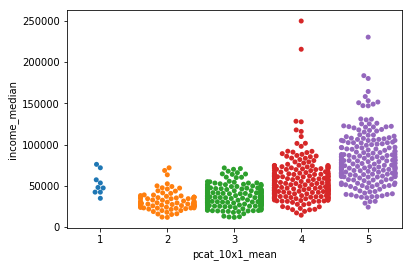

In [14]:
sns.swarmplot(x="pcat_10x1_mean", y="income_median", data=train)

#### What we expected.  Higher income equals higher connectivity/speeds. 

#### So how does that look across the most populous races and/or ethnicities?

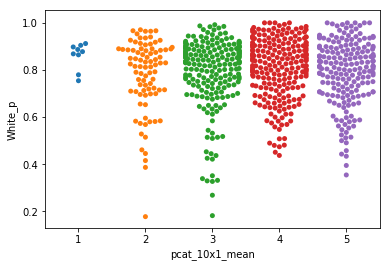

In [15]:
sns.swarmplot(x="pcat_10x1_mean", y="White_p", data=train)

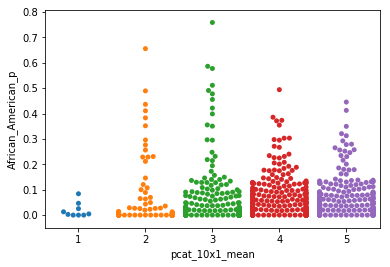

In [16]:
sns.swarmplot(x="pcat_10x1_mean", y="African_American_p", data=train)

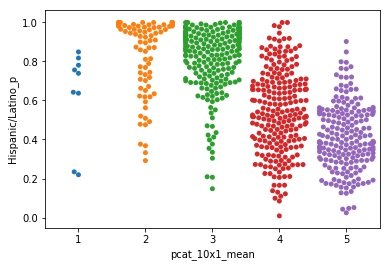

In [17]:
sns.swarmplot(x="pcat_10x1_mean", y="Hispanic/Latino_p", data=train)

#### A great visualization on how race effects broadband connectivity.  As the percentage of hispanics in a block group goes up, the percent of connectivity goes down. Looks the opposite for whites.

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


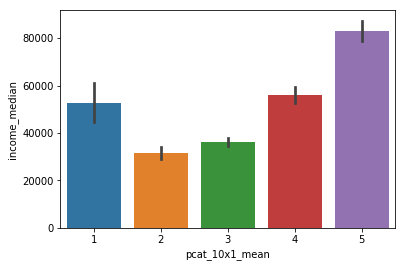

In [18]:
sns.barplot(x="pcat_10x1_mean", y="income_median", data=train)

#### Interesting....the 1 connectivity category (lowest average rate of broadband adoption) has a higher median income than that of categories 2 and 3. This could be due to low population in that area or possibly age.

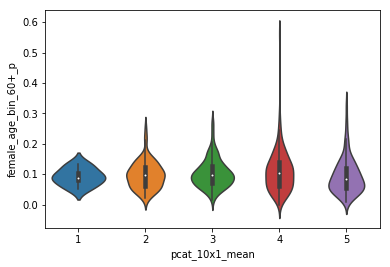

In [19]:
sns.violinplot(x="pcat_10x1_mean", y="female_age_bin_60+_p", data=train)

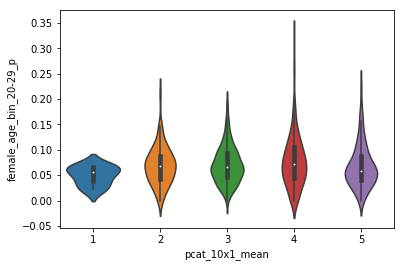

In [20]:
sns.violinplot(x="pcat_10x1_mean", y="female_age_bin_20-29_p", data=train)

#### It appears there is not a huge difference between these two groups.

_These two age groups of women were chosen to represent the opposite ends of the spectrum, respectively, with regard to adults who have the ability to purchase broadband (as opposed to the 0-20 age group, who on average do not have the ability to impact these purchasing decisions)._

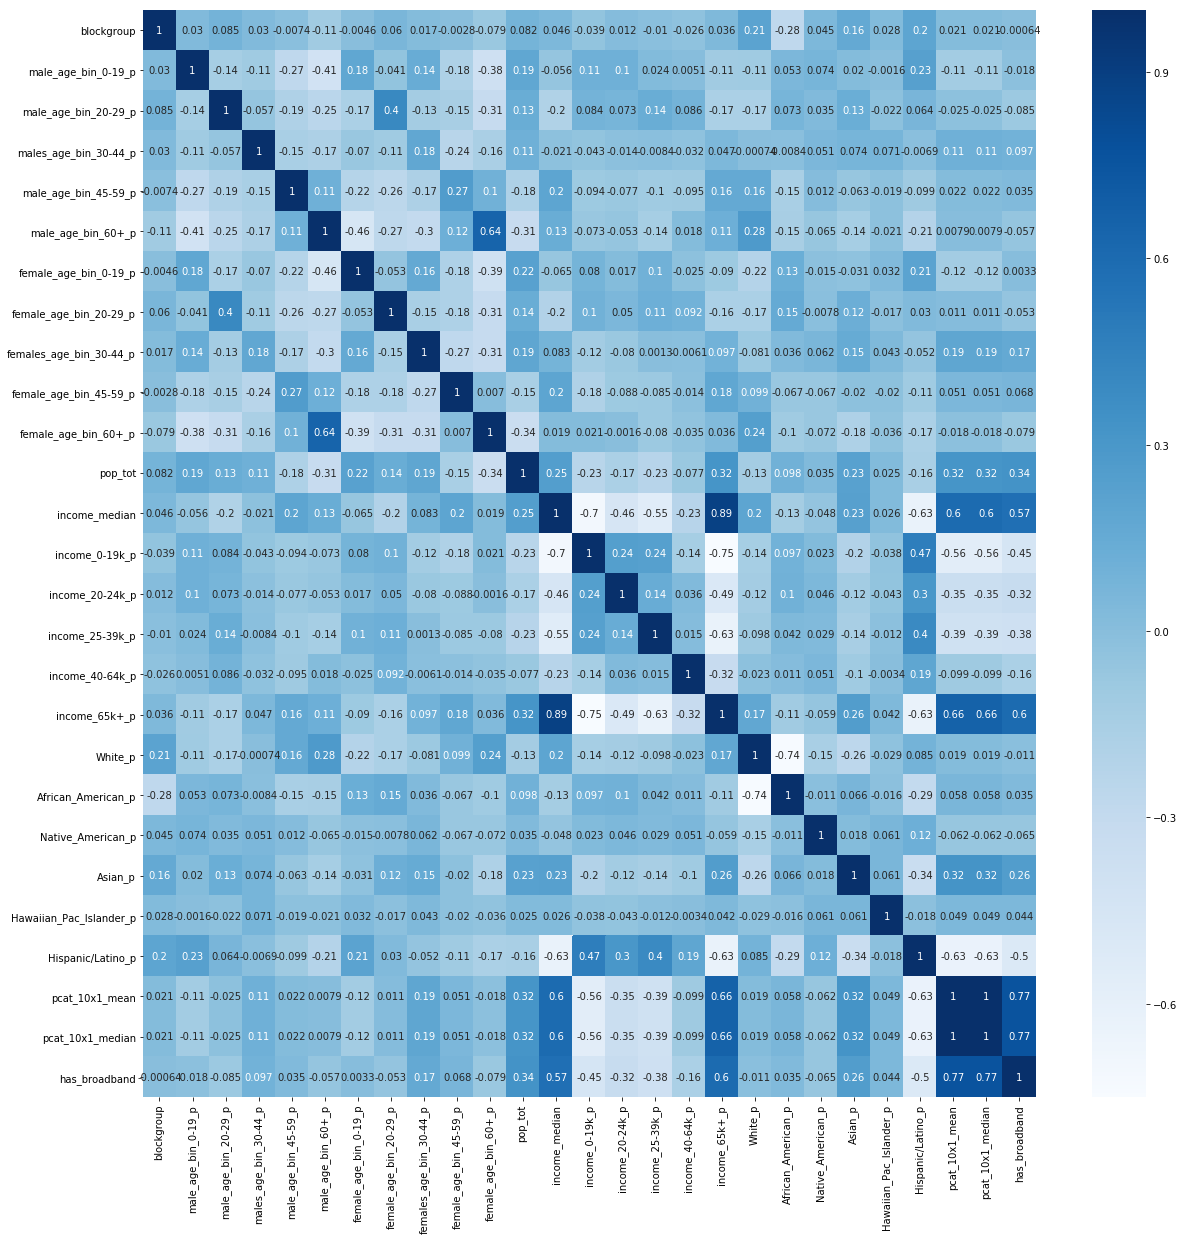

In [21]:
plt.figure(figsize=(20, 20))
sns.heatmap(train.corr(), cmap='Blues', annot=True)

#### median income looks to be highly positively correlated with pcat_10x1. There's also a strong negative correlation with Hispanic/Latino and pcat_10x1

#### Internet adoption by median income

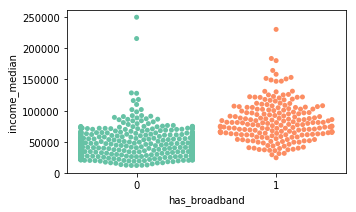

In [22]:
plt.figure(figsize=(5,3))
sns.swarmplot(x="has_broadband", y="income_median", data=train, palette="Set2")

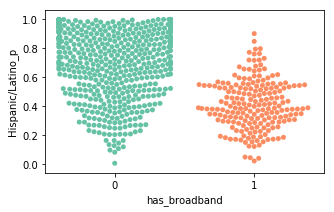

In [23]:
plt.figure(figsize=(5,3))
sns.swarmplot(x="has_broadband", y="Hispanic/Latino_p", data=train, palette="Set2")

(0, 1.0)

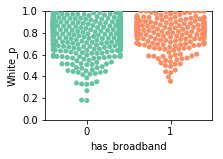

In [24]:
plt.figure(figsize=(3,2))
sns.swarmplot(x="has_broadband", y="White_p", data=train, palette="Set2")
plt.ylim(0, 1.0)

(0, 1.0)

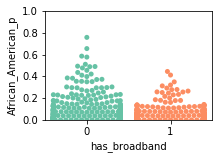

In [25]:
plt.figure(figsize=(3,2))
sns.swarmplot(x="has_broadband", y="African_American_p", data=train, palette="Set2")
plt.ylim(0, 1.0)

(0, 1.0)

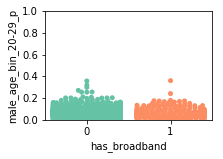

In [26]:
plt.figure(figsize=(3,2))
sns.swarmplot(x="has_broadband", y="male_age_bin_20-29_p", data=train, palette="Set2")
plt.ylim(0, 1.0)

(0, 1.0)

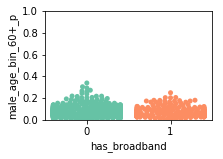

In [27]:
plt.figure(figsize=(3,2))
sns.swarmplot(x="has_broadband", y="male_age_bin_60+_p", data=train, palette="Set2")
plt.ylim(0, 1.0)

#### Internet adoption by percentage of Hispanic/Latino density in all block groups

(0, 1.0)

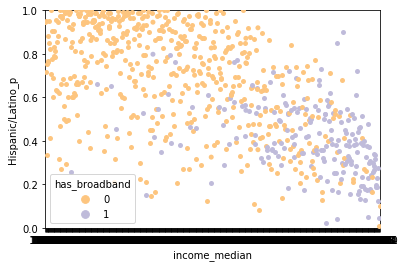

In [28]:
sns.swarmplot(x="income_median", y="Hispanic/Latino_p", hue='has_broadband', data=train, palette="PuOr")
plt.ylim(0, 1.0)

#### Proportion hispanic/latino (ethnicity) by median income in block groups.  It appears that as the percentage of hispanics go up, so does the median income. Same with broadband connectivity.

(0, 1.0)

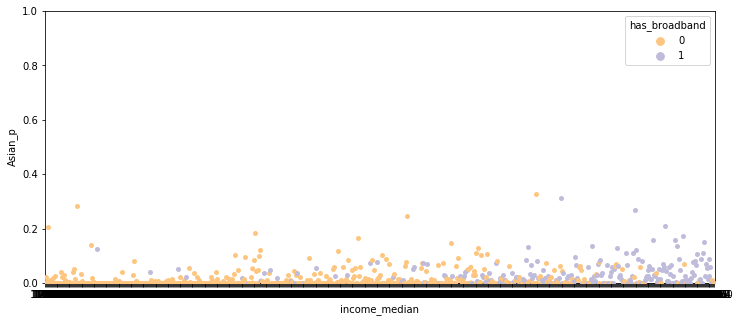

In [29]:
plt.figure(figsize=(12,5))
sns.swarmplot(x="income_median", y="Asian_p", hue='has_broadband', data=train, palette="PuOr")
plt.ylim(0, 1.0)

(0, 1.0)

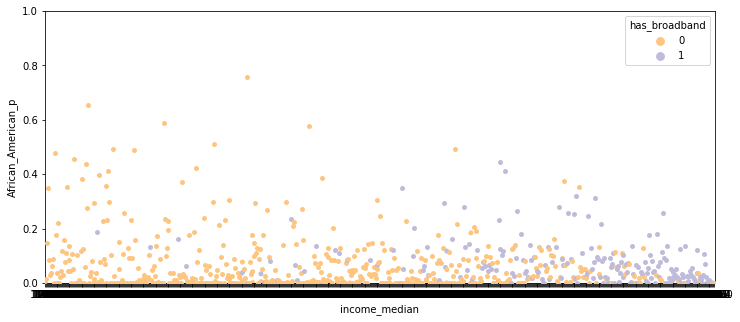

In [30]:
plt.figure(figsize=(12,5))
sns.swarmplot(x="income_median", y="African_American_p", hue='has_broadband', data=train, palette="PuOr")
plt.ylim(0, 1.0)

(0, 1.0)

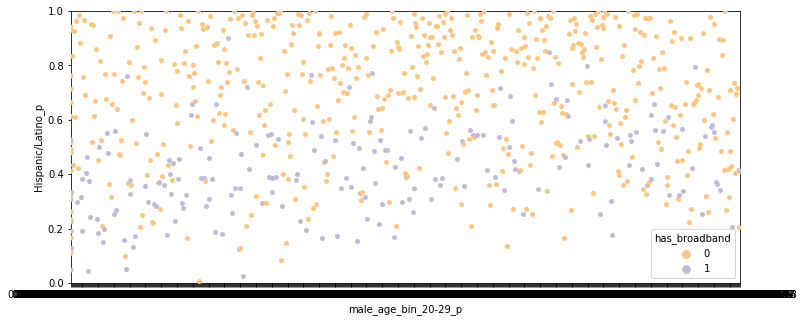

In [31]:
plt.figure(figsize=(12,5))
sns.swarmplot(x="male_age_bin_20-29_p", y="Hispanic/Latino_p", hue='has_broadband', data=train, palette="PuOr")
plt.ylim(0, 1.0)

#### Ages 20-29 in Hispanic block groups. Seems to be no trend here

(0, 1.0)

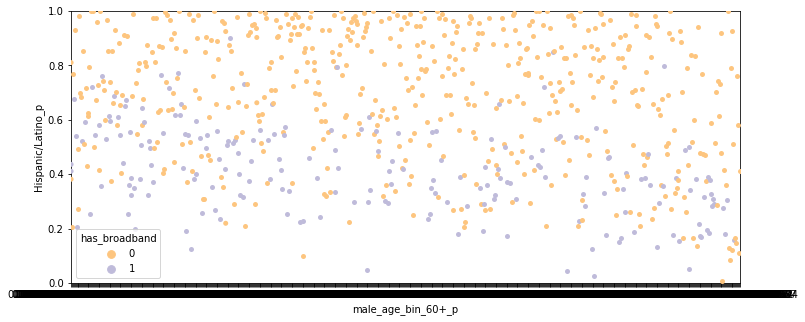

In [32]:
plt.figure(figsize=(12,5))
sns.swarmplot(x="male_age_bin_60+_p", y="Hispanic/Latino_p", hue='has_broadband', data=train, palette="PuOr")
plt.ylim(0, 1.0)

#### Ages 60+ in hispanic block groups. Also seems to be no underlying trend here